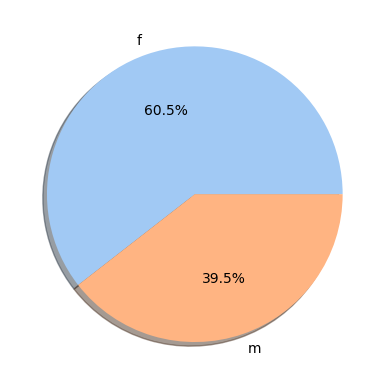

In [3]:
#Cau 1:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('patient_heart_rate_clean.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

gb = df.groupby(['Gender'])['Gender'].agg(['count'])

labels = gb.index 
data = list(gb['count'])

colors = sns.color_palette('pastel') 

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

In [2]:
# Cau 2
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']
df.head(5)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
0,0,0,1.0,56.0,70.0,Micky,Mous,72,m,0,6,Micky Mous
1,1,14,1.0,56.0,70.0,Micky,Mous,69,m,6,12,Micky Mous
2,2,28,1.0,56.0,70.0,Micky,Mous,71,m,12,18,Micky Mous
3,3,43,2.0,34.0,70.0,Donald,Duck,85,f,0,6,Donald Duck
4,4,57,2.0,34.0,70.0,Donald,Duck,84,f,6,12,Donald Duck


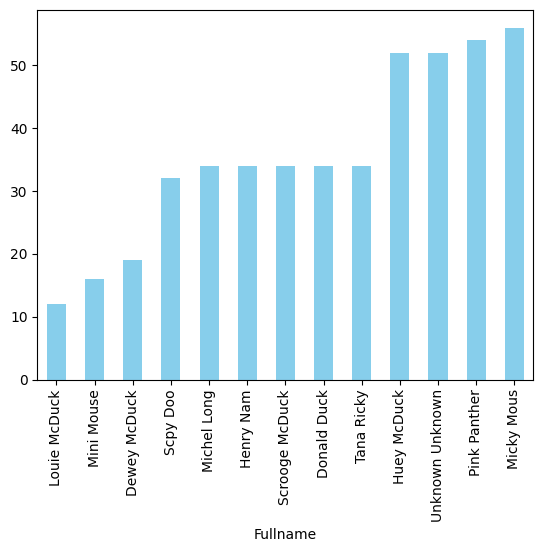

In [3]:
#Câu 3: 
age_by_name = df.groupby('Fullname')['Age'].mean()
age_by_name = age_by_name.sort_values()

age_by_name.plot(kind='bar', color='skyblue')
plt.show()

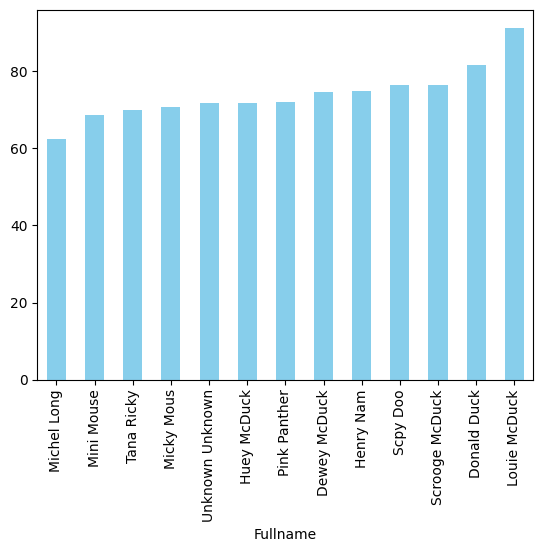

In [4]:
# Cau 4
avg_pulse_rate = df.groupby('Fullname')['PulseRate'].mean().sort_values()
avg_pulse_rate.plot(kind='bar', color='skyblue')
plt.show()

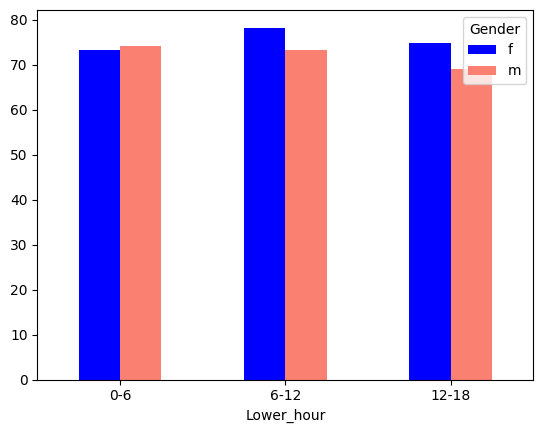

In [5]:
#Cau 5
avg_pulse_by_hour_gender = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().unstack()

avg_pulse_by_hour_gender.plot(kind='bar', color=['blue', 'salmon'])
plt.xticks(ticks=range(len(avg_pulse_by_hour_gender.index)), 
           labels=['0-6', '6-12', '12-18'], 
           rotation=0)

plt.xticks(rotation=0)

plt.show()

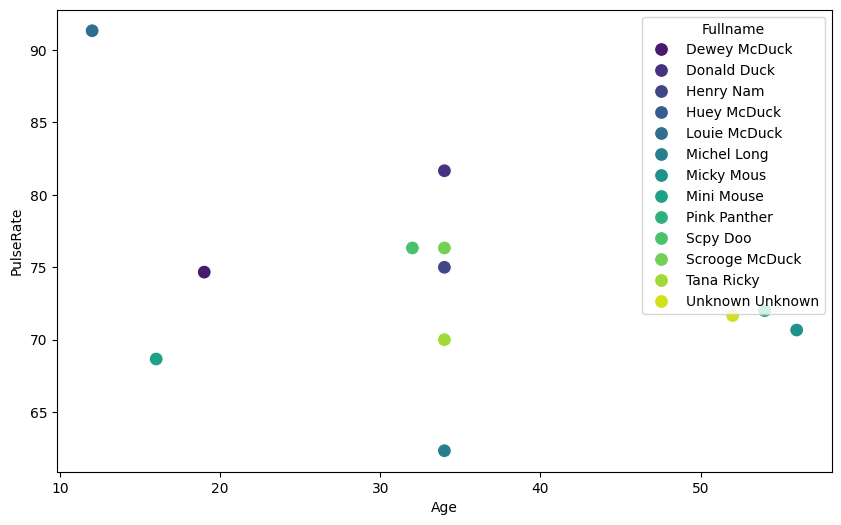

In [6]:
#Cau 6
avg_age = df.groupby('Fullname').agg({'Age': 'mean', 'PulseRate': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PulseRate', data=avg_age, hue='Fullname', palette='viridis', s=100)
plt.show()

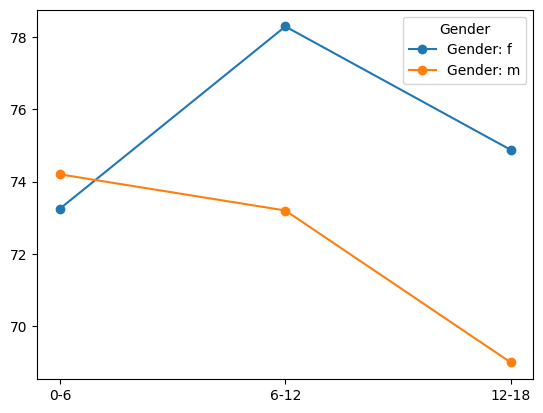

In [7]:
#Cau 7
avg_pulse_by_hour_gender = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().unstack()
for gender in avg_pulse_by_hour_gender.columns:
    plt.plot(avg_pulse_by_hour_gender.index, avg_pulse_by_hour_gender[gender], marker='o', label=f'Gender: {gender}')
plt.xticks(ticks=avg_pulse_by_hour_gender.index, 
           labels=['0-6', '6-12', '12-18'], 
           rotation=0)
plt.legend(title='Gender')
plt.show()